# Regression

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
rng = np.random.RandomState(42)

**Question** Faire un jeu de 1000 données tirées aléatoirement avec une loi normale multidimensionnelle (multivariée) centrée en $(0,0)$ de matrice de covariance. 

$$\left(\begin{array}{cc}2.0 & 1.5\\1.5&2.0\end{array} \right)$$

C'est donc être une matrice de nombres aléatoires de 1000 par 2 que vous appelez `data1`. *Aide* Regardez dans le module `random`... 

In [3]:
mean = (0, 0)
cov = [[2.0, 1.5], [1.5, 2.0]]
data1 = np.random.multivariate_normal(mean, cov, 1000)
data1

array([[-0.66510914,  3.31222833],
       [ 0.38710692, -0.14703564],
       [-1.45235573, -2.16869718],
       ...,
       [-0.3145018 ,  0.36150808],
       [ 0.20224345, -0.23402591],
       [ 1.92835392,  1.42303218]])

**Question** Vérifiez que la moyenne et la variance sont bien proches de ce qui est attendu. 

In [4]:
np.mean(data1)

0.03510860994560657

In [5]:
np.var(data1)

2.1250130966492073

**Question** La matrice `X1` a 1000 lignes et 1 colonne (1000,1) et c'est la première colonne de vos données. Le vecteur `y1` est de dimension (1000,) et c'est la seconde colonne de vos données. Définissez `X1` et `y1` et tracez le nuage de points

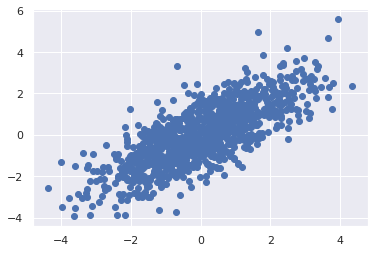

In [6]:
X1 = data1[:, 0].reshape(1000, 1)
y1 = data1[:, 1]
plt.scatter(X1, y1)

**Question** Faire un modèle de régression linéaire `r1` (sans intersection à l'origine puisque le nuage est centré en (0,0) ) et l'entraîner avec `X1` et `y1`.

In [7]:
from sklearn import linear_model

In [8]:
r1 = linear_model.LinearRegression(fit_intercept=False)
r1.fit(X1, y1)

LinearRegression(fit_intercept=False)

**Question** Observez le coefficient dans `r1.coef_`

In [9]:
r1.coef_

array([0.7631507])

**Question** Calculer les prédictions de `r` sur les données de `X1`. On appelle ce vecteur `y1_pred`... C'est une droite

In [10]:
y1_pred = r1.predict(X1)
y1_pred

array([-5.07578505e-01,  2.95420920e-01, -1.10836629e+00,  1.97464569e-01,
        8.60566982e-01,  6.52295598e-01, -9.38991280e-01,  1.07383692e+00,
       -5.30667588e-01,  5.12868456e-01,  4.97119457e-01, -1.81574846e+00,
        4.11562307e-01, -1.27094159e+00,  9.74821184e-01, -4.81460067e-01,
        7.36697418e-01, -5.64314114e-02, -5.19530578e-01,  1.90427432e+00,
        3.64616748e-01, -5.31015822e-01, -1.38139180e+00,  8.35851844e-01,
       -1.82744705e-01,  6.49252135e-01,  2.16279431e+00,  1.97679771e+00,
       -1.06437854e+00,  2.51429090e+00, -1.12141116e+00,  2.07808947e-01,
       -3.15162994e-01,  4.92203115e-01,  1.86014061e-01, -1.18943708e+00,
       -8.05992096e-01,  9.22657463e-01, -2.74329750e+00, -4.97479675e-01,
        1.75766655e-01,  1.27850672e+00, -2.26928133e+00,  1.50213050e+00,
        5.99522923e-01, -1.25278364e-01,  6.06092795e-01, -5.14679669e-01,
       -1.83405163e+00,  3.60682232e-01, -4.06631763e-01,  2.87412312e-01,
       -1.31108089e+00,  

**Question** Tracer le nuage avec la droite en rouge

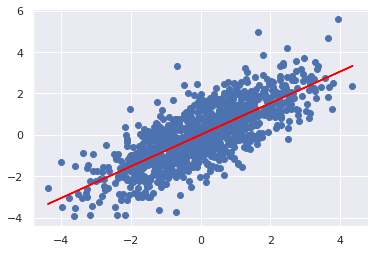

In [11]:
plt.scatter(X1, y1)
plt.plot(X1, y1_pred, color='red')

Avec les moindres carrés, on calcule

$$\mathop{\mathrm{argmin}}_a \sum_{x,y\in X_1\times y_1}  (ax - y)^2$$


**Question** Développer et calculer la dérivée par rapport à $a$ et chercher où la dérivée s'annule. Vérifier que vous obtenez le même résultat que le coefficient de $r1$.

*Réponse*: (calcul de la dérivée)

(0.7631507009808348, 0.7631507009808349)

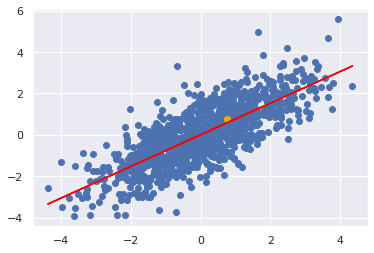

In [12]:
derivee = (y1_pred[1] - y1_pred[0]) / (X1[1] - X1[0])

plt.scatter(X1, y1)
plt.plot(X1, y1_pred, color='red')
plt.scatter(derivee, derivee, color='orange')

derivee[0], r1.coef_[0]

Sous forme matricielle on peut réécrire

$$\mathop{\mathrm{argmin}}_a \sum_{x,y\in X_1\times y_1}  (ax - y)^2  = \mathop{\mathrm{argmin}}_a \Vert aX_1-y_1 \Vert^2$$

**Question** Sachant que pour un vecteur $x$ on a $\Vert x \Vert^2 = \langle x,x\rangle = x^\top x$ et en utilisant la distributivité de la multiplication sur l'addition, réécrivez le développement et la dérivée sous forme matricielle. 

*Réponse* :  

In [13]:
a = np.linalg.inv(X1.T@X1)@X1.T@y1

((a * X1).T - y1.T) @ ((a * X1) - y1)

array([[-4.34264124e+01,  1.92777475e+00,  2.84336490e+01,
        -8.97299256e+00, -5.40718119e+00, -9.66044233e+00,
         2.59903138e+01,  2.54605108e+00, -4.47246491e+00,
        -8.85740612e+00, -8.38161348e+00,  2.76332929e+01,
        -5.65368215e-01,  1.76281174e+01, -1.49093856e+01,
         1.78840947e+01, -3.26069120e+01,  3.48723907e-01,
         8.62882953e+00, -5.48102509e+01, -1.95768114e+01,
         4.89047490e+01, -6.33434220e+00,  2.91365068e+00,
         1.27111960e+00,  5.64077016e+00, -8.85924307e+00,
        -2.69446562e+01,  1.82930070e+01, -2.77520909e+01,
         3.22352412e+01,  2.30758800e+01,  1.58381092e+01,
        -5.65313996e+00,  7.68597068e+00,  2.45965959e+00,
         1.55613063e+01, -2.65197657e+01,  4.62595296e+01,
         1.19541434e+01, -4.90198302e+00, -7.36036669e+00,
         2.32443561e+01, -1.13730818e+01, -2.61306260e+01,
         5.28134685e+00, -6.48337848e+00,  5.48245146e+00,
         1.32620778e+01,  2.07514932e+01,  1.14910838e+0

**Question** Maintenant en supposant que $X_1^TX_1$ est définie positive, (elle est positive), et donc possède une inverse et sachant que $A^{-1}A$ est l'identité pour toute matrice $A$ inversible, exprimez de façon matricielle la valeur de $a$ et calculez-la de cette façon.

_Aide_ : `np.linalg.inv(A)` inverse une matrice, `np.dot(A,B)` fait une multiplication de matrice, une autre notation est `A@B`.

*Réponse* : La dérivée s'annule si ... (à compléter)


In [14]:
a = np.linalg.inv(X1.T@X1)@X1.T@y1
a[0]

0.7631507009808357

**Remarque** Le calcul qu'on vient de faire est toujours correct quand la matrice $X_1$ a plus d'une seule colonne!

## Avec un nuage de points qui n'est pas centré... 

On génère à nouveau ces données mais cette fois avec des données centrées en $(3,2)$ pour la même matrice de covariance. Nous allons recommmencer mais notre calcul analytique est désormais faux si on ne prend pas en compte l'ordonnée à l'origine...

**Question**  Générer les données, tracer les données, la droite de régression comme au début de ce TD. On appelle les nouveaux objets `data2`, `X2`, `y2`, et `r2`.

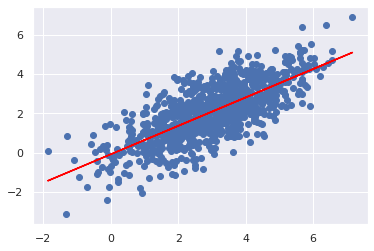

In [15]:
mean = (3, 2)
cov = [[2.0, 1.5], [1.5, 2.0]]
data2 = np.random.multivariate_normal(mean, cov, 1000)

X2 = data2[:, 0].reshape(1000, 1)
y2 = data2[:, 1]

r2 = linear_model.LinearRegression()
r2.fit(X2, y2)

y2_pred = r2.predict(X2)

plt.scatter(X2, y2)
plt.plot(X2, y2_pred, color='red')

On doit désormais résoudre 

$$\mathop{\mathrm{argmin}}_{a,b} \sum_{x,y\in X_2\times y_2}  (ax + b - y)^2$$

Mais c'est un peu plus pénible à résoudre, sauf si on suit l'écriture matricielle. Un petit truc est d'écrire 

$$\mathop{\mathrm{argmin}}_{a,b} \sum_{x,y\in X_2\times y_2}  (ax + b - y)^2=\mathop{\mathrm{argmin}}_{a,b} \Vert aX_2 + b\mathbf 1 -y_2 \Vert^2$$

où $\mathbf 1$ est un vecteur de 1 de dimension de $X_2$. Donc si j'appelle $w=(a,b)^\top$ et $X_{2b}$ est $X_2$ à laquelle on a ajouté une colonne de 1, cela s'écrit

$$\mathop{\mathrm{argmin}}_{w} \Vert X_{2b}w  -y_2 \Vert^2$$

Et donc on peut refaire le même calcul que précédemment!  Il suffit donc d'ajouter une dimension au problème et de la mettre à 1... 

**Question** Créer une matrice `X2b` en conséquence

In [16]:
b = np.ones(1000).reshape(1000, 1)
X2b = np.hstack((X2, b))
X2b # doit être (1000, 2)

array([[0.58943342, 1.        ],
       [2.79701719, 1.        ],
       [2.21592559, 1.        ],
       ...,
       [4.68423111, 1.        ],
       [3.51591862, 1.        ],
       [6.44212899, 1.        ]])

**Question** Résoudre maintenant le système avec les opérateurs matriciels comme précédemment.

In [75]:
a = np.linalg.inv(X2b.T@X2b)@X2b.T@y2
w = (a + b).T

((X2b @ w).T - y2.T) @ ((X2b @ w) - y2) # à revoir, j'ai du looper quelque chose

array([[1.72180033, 1.72180033, 1.72180033, ..., 1.72180033, 1.72180033,
        1.72180033],
       [0.92468681, 0.92468681, 0.92468681, ..., 0.92468681, 0.92468681,
        0.92468681]])

## Approche par descente de gradient

L'approche précédente se généralise. La fonction derrière le `argmin` est ce qu'on appelle une **fonction objectif** (ou fonction de perte) et l'approche est de trouver les paramètres qui minimisent cette perte. 

$$\mathop{\mathrm{argmin}}_{w} f(X, y, w)$$

**Question** Quelle est la fonction objectif de l'exemple précédent avec la régression pour le nuage de points centré en $(3,2)$? (Reprennez les  mêmes objets $X_{2b}$ et $y_2$.

*Réponse*: y2 = (0,74037734 * X2b) - 0,23143581.

Dans le cas précédent, cela marche très bien car on minimise une fonction dérivable, convexe, il y a un minimum global et une solution analytique. Par ailleurs, la matrice est assez petite car il y a peu de données, mais si on a des *big data*, cela ne marche plus. Le calcul de l'inverse est trop long à calculer.

**Question** Quelle est la complexité en temps du calcul de l'inverse d'une matrice de dimension $n$ par $n$ ? 

*Réponse* : O(n^3) avec l'algorithme de Gaussian pour la plupart, O(n^2,4) pour les meilleurs

Moralité : en prenant plus de données ou des fonctions de perte plus compliquées pour lesquelles on n'a pas de solution analytique, il faut changer de façon de faire... 

Commençons par voir comment approcher la solution analytique par un autre moyen. L'idée ici est de suivre la pente de la courbe de la fonction de perte. On calcule donc la dérivée et on va dans la direction opposée à la dérivée par petites touches. (Voir [cette page](https://www.neural-networks.io/fr/single-layer/gradient-descent.php) pour les petits dessins qui font comprendre.) 

L'algorithme part donc d'un point aléatoire (une valeur pour $w$ aléatoire), calcul la dérivée de la fonction objectif (notée $\nabla f$) et modifie $w$ avec un petit incrément qui est un facteur de cette dérivée. On appelle $\eta$ ce facteur.

\begin{equation} w^{(t)} = w^{(t-1)} - \eta\nabla f(X, y, w^{(t-1)})\qquad (\text{Eq. } 1) 
\end{equation}

Dans la suite, on déroule d'abord à la main cet algorithme pour un seul pas passant de l'étape $t=0$ à l'étape $t=1$, puis on écrit l'algorithme complet.

### De t=0 à t=1

**Question** Tirez au hasard (nombres entre 0 et 1) un 1-d array de taille 2 pour représenter les 2 coefficients $a$ et $b$ de notre problème. Appelez-le `w_trans`

In [48]:
w_trans = np.random.random_sample(size=(2,))
w_trans

array([0.80867318, 0.48124368])

**Question** Calculez la valeur de la fonction objectif pour cette valeur de `w_trans`

In [70]:
((X2b @ w_trans).T - y2.T) @ ((X2b @ w_trans) - y2)

1569.975858766374

Calculons la valeur de la dérivée de $\Vert X_{2b}w -y_2 \Vert^2$. On l'appelle `G`. C'est la dérivée d'une fonction de la forme $(h(x))^2$ et vaut donc $2h'(x)h(x)$ avec ici $h(x)$ est $E(X_{2b}, y_2, w)$, qui est l'erreur, la différence entre la valeur calculée et la valeur prédite (l'objectif c'est l'erreur quadratique). 

La dérivée doit être calculée par rapport à chacun des paramètres, $a$ et $b$, C'est un vecteur de taille 2. Ici $h'$ est constante (c'est $X_{2}$) pour la première coordonnée ($a$) et 1 pour la seconde coordonnée ($b$), c'est donc $X_{2b}$. On calcule donc $E$, mais attention sous la forme d'une matrice (1000,1). `G` est une matrice de 1000 lignes et 2 colonnes.

**Question** calculez `G`

In [76]:
# pas réussi

(1000, 2)

In [ ]:
G = 2 * * # pas réussi
G.shape 

L'erreur comme l'objectif sont calculés comme une somme pour tous les points du jeu de données, la dérivée c'est aussi la somme des dérivées en chaque point de donnée. 
La valeur de la dérivée en ces paramètres `w_trans` est maintenant la somme de ces dérivées. C'est un vecteur de taille 2 qu'on notera ici `nabla`

**Question** Calculez `nabla`

In [ ]:
nabla = # n'a pas réussi
nabla

**Question** Fixez un pas de gradient `eta` de 0.00005, et calculez la nouvelle valeur de $w$ dans `w_trans_suivant` avec l'équation (Eq. 1)

**Question** Recalculez la valeur de l'objectif dans `obj_suivant` et comparez avec la valeur de l'objectif avant d'effectuer ce pas de gradient.


### Algorithme

On repart maintenant de la nouvelle valeur et on itère. Globalement l'algorithme fait : 

```
Initialiser w aléatoirement
t = 0
Tant que t < n_iter: 
  Calculer l'erreur 
  Calculer le gradient
  Modifier w avec l'Eq. 1
  Incrémenter t
```

**Question** Écrire cet algorithme dans une fonction et l'essayer avec `X2b` et `y2` et `X1`, `y1`.

In [19]:
def regr(X, y, eta=0.00005, n_iter=100, verbose=False):
    """avec verbose=True on peut afficher la valeur de la fonction objectif """
    pass

Le réglage du pas de gradient peut être complexe...

**Question** Vérifier que l'algorithme ne converge pas vers une solution si le pas est trop grand

**Question** Une petite heuristique est de vérifier si l'objectif décroit. Si tel est le cas on peut augmenter de 10% le pas de gradient et sinon on le divise par 10. 

In [20]:
def regr_tuned(X, y, eta=0.0001, n_iter=100, verbose=False):
    """On règle eta en contrôlant la valeur de l'objectif"""
    pass